In [30]:
import keras 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [31]:
n_pts = 500
centers = [[-1,1], [-1,-1], [1,-1], [1,1], [0,0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

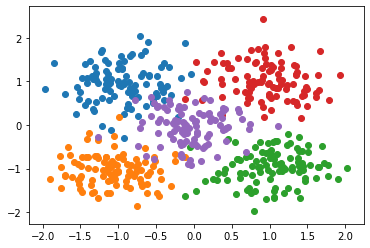

In [32]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

In [33]:
from keras.utils.np_utils import to_categorical

In [34]:
y_cat = to_categorical(y, 5)
print(y_cat)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [35]:
y_cat.shape

(500, 5)

In [36]:
model = Sequential()
model.add(Dense(units=5, input_shape=(2,), activation='softmax'))
model.compile(Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs=100)

Epoch 1/100
500/500 [==============================] - 0s 370us/step - loss: 1.2554 - acc: 0.5040
Epoch 2/100
500/500 [==============================] - 0s 23us/step - loss: 0.6350 - acc: 0.8360
Epoch 3/100
500/500 [==============================] - 0s 42us/step - loss: 0.4134 - acc: 0.9100
Epoch 4/100
500/500 [==============================] - 0s 50us/step - loss: 0.3313 - acc: 0.9460
Epoch 5/100
500/500 [==============================] - 0s 38us/step - loss: 0.2886 - acc: 0.9440
Epoch 6/100
500/500 [==============================] - 0s 37us/step - loss: 0.2636 - acc: 0.9480
Epoch 7/100
500/500 [==============================] - 0s 40us/step - loss: 0.2455 - acc: 0.9480
Epoch 8/100
500/500 [==============================] - 0s 39us/step - loss: 0.2337 - acc: 0.9480
Epoch 9/100
500/500 [==============================] - 0s 41us/step - loss: 0.2238 - acc: 0.9440
Epoch 10/100
500/500 [==============================] - 0s 46us/step - loss: 0.2159 - acc: 0.9460
Epoch 11/100
500/500 [======

500/500 [==============================] - 0s 56us/step - loss: 0.1514 - acc: 0.9500
Epoch 85/100
500/500 [==============================] - 0s 40us/step - loss: 0.1515 - acc: 0.9500
Epoch 86/100
500/500 [==============================] - 0s 48us/step - loss: 0.1513 - acc: 0.9460
Epoch 87/100
500/500 [==============================] - 0s 31us/step - loss: 0.1534 - acc: 0.9500
Epoch 88/100
500/500 [==============================] - 0s 24us/step - loss: 0.1522 - acc: 0.9520
Epoch 89/100
500/500 [==============================] - 0s 40us/step - loss: 0.1522 - acc: 0.9500
Epoch 90/100
500/500 [==============================] - 0s 32us/step - loss: 0.1509 - acc: 0.9500
Epoch 91/100
500/500 [==============================] - 0s 43us/step - loss: 0.1515 - acc: 0.9480
Epoch 92/100
500/500 [==============================] - 0s 40us/step - loss: 0.1518 - acc: 0.9500
Epoch 93/100
500/500 [==============================] - 0s 32us/step - loss: 0.1520 - acc: 0.9500
Epoch 94/100
500/500 [===========

In [38]:
def plot_multiclass_decision_boundary(X, y_cat, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

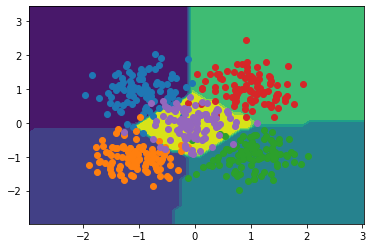

In [39]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

# Test 

Prediction is : [3]


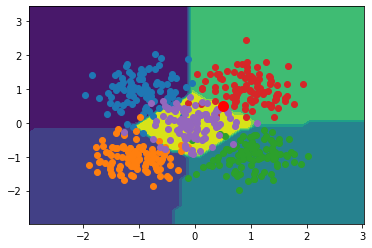

In [40]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
x = 0.5
y = 0.5
point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x],[y], marker ='o', markersize=10, color='r')
print("Prediction is :", prediction)